### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from packages.mixture.GaussianMixture import GaussianMixture

# 1. Question 1 (35 pts)

**Consider the following Bayesian networks for a gene regulatory network in plant.**

![image.png](img/Q1_Bayesian_Network.png)
*Figure 1: Plant gene regulatory networks. An ancestral gene regulatory network (left) and a gene regulatory network modified in evolution (right).*

***

**The conditional probability distribution for the expression level of gene $i$, denoted by $G_i$, is given as a linear regression model:**

$$P(G_i|Pa(G_i))=N(\beta_{0i} +G_{Pa(Gi)}\beta_i,\sigma_i^2),$$

**where** 
- **$Pa(G_i)$ is the parents of $G_i$ in the network.**
- **$\beta_i$ is a vector of regresson coefficients corresponding to genes in $Pa(G_i)$.**
- **$\beta_{0i}$ is an intercept.**
- **$\sigma_i^2$ is the variance.**



## 1.a. (5 pts)
**TODO:**
- **Write down the local conditional probability distributions for each of the nodes $G_1,\ldots, G_7$ in the gray part of the ancestral network in Figure 1.**


$P(G_1|Pa(G_1))=P(G_1)$

$P(G_2|Pa(G_2))=P(G_2)$

$P(G_3|Pa(G_3))=P(G_3)$

$P(G_4|Pa(G_4))=P(G_4)$

$P(G_5|Pa(G_4))=P(G_5)$

$P(G_6|Pa(G_6))=P(G_6|G_1,G_2,G_3,G_4,G_5)$

$P(G_7|Pa(G_7))=P(G_7|G_6)$

## 1.b. (5 pts)
**TODO**:
- **Circle the nodes in the Markov blanket of node $O$.** 
- **Circle the nodes in the Markov blanket of node $I$.**

In [2]:
## picky to not include O or I?

### Node O
![image.png](img/Q1bi_Bayesian_Network.png)

### Node I
![image.png](img/Q1bii_Bayesian_Network.png)

## 1.c. (15 pts)
**TODO:**
- **Answer the following questions about the ancestral network in Figure 1. Provide a brief explanation for your answer.**

    - **Are $O$ and $I$ $d$-separated by the red node?**
    - **Are $O$ and $I$ $d$-separated by $G_7$?**
    - **Are $O$ and $G_7$ $d$-separated by the red node?** 
    - **Are $O$ and $G_5$ $d$-separated by $G_6$?**
    - **Are $O$ and $G_5$ $d$-separated by the red node?**


In [3]:
# x and y are d-separated given Z 
# if all possible paths between x and y are blocked

# A path between x and y is blocked if 
# the path includes a node n such that either:
#    (1)   (n is not a collider node) AND (n is in Z)
#
#    (2)   (n is a collider node) AND 
#          (neither n nor any of its descendants is in Z)

#?? n is not a collider node at all or only a collider node of x and y?

### Are $O$ and $I$ $d$-separated by the red node?
Yes. 

Given $Z=\{red\ node\}$, we have a path between $O$ and $I$ consisting of the red node. We have a second path between $O$ and $I$ consisting of the red node and purple node and a cerulean node. The red node is in both paths between $O$ and $I$. The red node is in $Z$ and the red node is not a collider node of $O$ and $I$. This fulfills criteria 1 of d-separation.

***


### Are $O$ and $I$ $d$-separated by $G_7$?
No. 

Given $Z=\{G_7\}$, we have a path between $O$ and $I$ consisting of the red node. We have a second path between $O$ and $I$ consisting of the red node and purple node and a cerulean node. $G_7$ is not on a path between $O$ and $I$, so neither criteria 1 nor criteria 2 cannot be fulfilled.

***

### Are $O$ and $G_7$ $d$-separated by the red node?
No. 

Given $Z=\{red\ node\}$, we have one path between $G_7$ and $O$ consisting of the red node. The red node is collider node of $G_7$ and $O$, so criteria 1 cannot be fulfilled. The red node is in $Z$, so criteria 2 cannot be fulfilled.

***

### Are $O$ and $G_5$ $d$-separated by $G_6$?
Yes.

Given $Z=\{G_6\}$, we have one path between $G_5$ and $O$ consisting of $G_6$, $G_7$, and the red node. $G_6$ is not a collider node of $G_5$ and $O$, and $G_6$ is in $Z$, so criteria 1 is fulfilled.

?? The red node is a collider node of $G_5$ and $O$, and $G_6$ is not a descendant of the red node, so criteria 2 is fulfilled. 


### Are $O$ and $G_5$ $d$-separated by the red node?
No.

Given $Z=\{red\ node\}$, we have one path between $G_5$ and $O$ consisting of $G_6$, $G_7$, and the red node. The red node is a collider node of $G_5$ and $O$, and the red node is in $Z$, so criteria 2 cannot be fulfilled. No other nodes on the path from $G_5$ and $O$ are in $Z$, so criteria 1 cannot be fulfilled.

## 1.d. (5 pts)
**The change of the network structure from left to right in Figure 1 can affect the local conditional probability distributions for individual nodes.**

**TODO:**
- **Which node has its local conditional probability distribution affected by this structural change?**

The green node into which the new connection is made will have its local conditional probability distribution changed. It used to have the purple node and cerulean node and cyan node as parents, but now has the purple node and cerulean node and orange node as parents.

## 1.e. (5 pts)

**TODO:**
- **Assume $N$ samples are provided as training data. Describe how you would perform MLE to estimate the parameters of the ancestral network in Figure 1.**

### Start
With MLE, we want to maximize the probability of observing the data given Bayesian network parameters:

$$\theta_{MLE}=argmax_{\theta} \log P(data|\theta)$$

We have a known graph structure, so we only need to learn the probability distribution.


### Expression before taking the derivative
MLE starts by calculating the product of the joint probability of all nodes in the graph over all samples, then taking the log of that to get the log likelihood:

$$\ell(p)=log \prod_{i=1}^N P(O^i, I^i, G_1^i, G_2^i,G_3^i,G_4^i,G_5^i,G_6^i, G_7^i, \ldots)$$

Multiplication inside the log is equivalent to the sum of the log of each of the multiplied terms, so we can replace the product with a summation:

$$\ell(p)=\sum_{i=1}^N \log P(O^i, I^i, G_1^i, G_2^i,G_3^i,G_4^i,G_5^i,G_6^i, G_7^i, \ldots)$$

The we use the chain rule to redefine the joint probability in terms of local conditional probabilities:

$$\ell(p)=\sum_{i=1}^N \log P(G_1^i)P(G_2^i)P(G_3^i)P(G_4^i)P(G_5^i)P(G_6^i|G_1^i,G_2^i,G_3^i,G_4^i,G_5^i)\ldots$$

Multiplication inside the log is equivalent to the sum of the log of each of the multiplied terms:

$$\ell(p)=\sum_{i=1}^N \log P(G_1^i)+\log P(G_2^i)+\log P(G_3^i)+\log P(G_4^i)+\ldots$$

We can distribute the summation to each of the terms to get:

$$\ell(p)=\sum_{i=1}^N \log P(G_1^i)+\sum_{i=1}^N\log P(G_2^i)+\sum_{i=1}^N\log P(G_3^i)+\sum_{i=1}^N\log P(G_4^i)+\ldots$$


### Taking the Derivative
The Bayesian Network parameters we want to estimate are the individual conditional probability distributions. To find these, we take the derivative of the expression with respect to an individual conditional probability distribution, and set it equal to zero to solve for the maximum. This eliminates all of the other terms:

$$\frac{d\ell(p)}{dp_{G_1}}=\frac{d}{dp_{G_1}}\left(\sum_{i=1}^N \log P(G_1^i)\right)=\frac{d}{dp_{G_1}}\left( \sum_{i=1}^N \log  p^{G_1^i}(1-p)^{(1-G_1^i)}\right)=0$$

which can be solved to get the parameter we want:
$$\hat{p}_{G_1}=\frac{ \sum_{i=1}^N G_1^i}{N}$$

### Counting Exercise

We estimate each of the individual conditional probability parameters by summing over the columns of the conditional probability for the $N$ samples. For example, with $P(G_1)$ we find column $G_1$, sum up the number of samples with $G_1=1$, then divide by $N$.

# 2. Question 2 (25 pts)
**Consider a Gaussian graphical model $N(0,\Theta^{-1})$, where $\Theta$ is a 24 × 24 matrix, with the following undirected graph structure over 24 genes for BRCA gene regulation.**
![image.png](img/Q2_Gaussian_graphical_model.png)
*Figure 2: Gaussian graphical model*
***


In [4]:
# ?? Markov blanket includes only neighbors of BRCA1?
# ?? Theta^-1 is covariance matrix or Theta is?

## 2.a. (5 pts)
**TODO:**
- **What are the genes in the Markov blanket of BRCA1?**

Neighbors of BRCA1:
- TFAP2C
- THBS1
- CDK2
- MSH2
- CKS2
- CENPE
- BARD1
- KPNA2
- BRAP
- ESR1
- ACAT2
- FANCA
- NCAPH
- BRIP1
- CHEK1

## 2.b. (5 pts)
**TODO**:
-  **Are BRCA1 and ELOVL5 conditionally independent given AQP1 and CDK2?**

Yes.

AQP1 is the only neighbor of ELOVL5, so AQP1 blocks all paths between ELOVL5 and BRCA1. Given AQP1, ELOVL5 is conditionally independent of all other nodes in the graph (including BRCA1).

## 2.c. (5 pts)
**TODO:**
- **Explain how you would obtain the marginal distribution of BRCA1.**

To obtain the marginal distribution $p(BRCA1)$, start by finding the joint distribution over all nodes in the graph.

$$p(BRCA1, CDK2, AQP1, ELOVL5, \ldots)=N(\mu,\Sigma)$$

From this, we simply extract the parameters for BRCA1:

$$\mu=\begin{bmatrix}
    \mu_{BRCA1}\\
    \mu_{CDK2}\\
    \mu_{AQP1}\\
    \vdots
\end{bmatrix}$$


$$\Sigma=\begin{bmatrix}
    \sigma_{BRCA1}^2 &  \ldots \\
   \vdots      & \ddots
\end{bmatrix}$$

and we get

$p(BRCA1)=N(\mu_{BRCA1},\sigma^2_{BRCA1})$

## 2.d. (5 pts)
**TODO:**
- **Assume you want to infer the conditional probability distribution of BRCA1 given all the other genes. Can you simplify this distribution?**

In [5]:
## do you mean simplified to regression model format?

![image.png](img/Q2_edge_graph.png)

Given


$$\mu=\begin{bmatrix}
    \mu_1\\
    \mu_2\\
    \vdots \\
    \mu_{24}
\end{bmatrix}$$


$$\Sigma=\begin{bmatrix}
    \sigma_{1,1}^2 &  \sigma_{1,2} & \ldots & \sigma_{1,24} \\
    \sigma_{2,1} &  \sigma_{2,2}^2 & \ldots & \sigma_{2,24} \\
    \vdots &  \vdots & \ddots & \vdots \\
    \sigma_{24,1} &  \sigma_{24,2} & \ldots & \sigma_{24,24}^2 \\
\end{bmatrix}$$


### Start
If we consider BRCA1 to be $x_1$ with 24 nodes we want $p(x_1|x_2,\ldots,x_{24})$. 

We can calculate this as the following complicated distribution:

$$p(x_1|x_2,\ldots,x_{24})=
N\left(\mu_1 + \left( x_{2:24}-\mu_{2:24} \right)^T\Sigma^{-1}_{2:24,2:24}\Sigma_{2:24,1}, 
\sigma^2_1 - \Sigma_{2:24,1}^T\Sigma^{-1}_{2:24,2:24}\Sigma_{2:24,1}\right)$$

### Simplification
However, we also know the Markov blanket for $x_1$ (i.e. BRCA1). We know that the the conditional distribution of $x_1$ given its Markov blanket is the same as the conditional distribution of $x_1$ given all other genes:

$$p(x_1|x_2,\ldots,x_{24})=p(x_1|x_2,\ldots,x_{16})$$

where $x_2,\ldots,x_{16}$ are the 15 genes (nodes) in the Markov blanket for BRCA1. We get the following simplified distribution:

$$p(x_1|x_2,\ldots,x_{16})=
N\left(\mu_1 + \left( x_{2:16}-\mu_{2:16} \right)^T\Sigma^{-1}_{2:16,2:16}\Sigma_{2:16,1}, 
\sigma^2_1 - \Sigma_{2:16,1}^T\Sigma^{-1}_{2:16,2:16}\Sigma_{2:16,1}\right)$$




## 2.e. (5 pts)
**TODO:**
- **Assume you are performing an MLE with $l_1$ regularization. As you increase the regularization parameter, how would the graph structure be affected?**

L1 regularization favors sparse models with fewer features. Given a gene that exerts a weak influence on another gene (i.e. weakly correlated), L1 regularization would likely reduce the correlation to zero. This effectively cuts the edge connection between those two genes.

The resulting graph structure would have many fewer edges.

# 3. Question 3 (40 pts)
**TODO**
- **Implement the EM algorithm for Gaussian mixture models.**
- **Apply this to the expression data for mouse HIP brain tissue from Homework 2. Use only the first 10 mice (the first 10 rows in the data matrix) and cluster the genes.**

### Parts of EM


#### Data

N samples $\{X^1,\ldots,X^N\}$

Each sample has J features: $X^n=\{x_1,\ldots,x_J\}$



***

#### Probability Model

Each of $K$ clusters is modeled as a multivariate Gaussian distribution. A single probability model is formed for a mixture of $K$ Gaussians by weighting each multivariate Gaussian distribution (mixing component) by its cluster size (mixing proportion):

$$p(X)=\sum_{k=1}^K p(X|c=k)p(c=k)$$

where
- $p(c=k)=\pi_k$ for $k=1,\ldots,K$
- $p(X|c=k) =N(\mu_k,\Sigma_k)$ for $k=1,\ldots,K$

The parameters to learn are $\pi_k$ and $\{\mu_k, \Sigma_k\}$ for $k=1,\ldots,K$


***

#### Inference

Assuming model is given, if we want to infer cluster label $c$ for a given sample $x$, we can use Bayes rule:

$$p(c=k|X)=\frac{p(X|c=k)p(c=k)}{p(X)}=
\frac{p(X|c=k)p(c=k)}{\sum_{m=1}^K p(X,c=m)}=
\frac{p(X|c=k)p(c=k)}{\sum_{m=1}^K p(X|c=m)p(c=m)}$$


***

#### MLE (fully observed data, c is observed)
Log likelihood:

$$\ell(p)=argmax_\theta \sum_{n=1}^N \log p( X^n, c^n)$$

which becomes
$$\ell(p)=\sum_{n=1}^N \log p(X^n|c^n) + \sum_{n=1}^N \log p(c^n)$$

where
- $N$ is the number of samples
- $p(c=k)=\pi_k$ 
- $p(X^n|c^n=k)=N(\mu_k, \Sigma_k)$


Taking the derivative of the log likelihood function for a given parameter and setting equal to zero gives us the following derivations:
$$\hat{\pi}_k=\frac{N_k}{N}$$

where $N_k$ is the number of samples in cluster $k$  for $k=1,\ldots,K$



$$\hat{\mu}_k =\frac{\sum_{n=1}^N X^n I(c^n=k)}{N_k}$$ 

where $I(c^n=k)$ is an indicator function equal to 1 if $c^n=k$ and 0 otherwise.


$$\hat{\Sigma}_k=\frac{\sum_{n=1}^N (X^n-\mu_k)(X^n-\mu_k)^T I(c^n=k)}{N_k}$$

***

#### EM (partial observed data, c is not known)

$$\ell(p)=\log \prod_{n=1}^N p(X^n)$$
becomes
$$\ell(p)=\sum_{n=1}^N \log p(X^n)$$
which expands to
$$\ell(p)=\sum_{n=1}^N \log \left( \sum_{k=1}^K p(X^n, c^n=k) \right)$$
which factorizes to
$$\ell(p)=\sum_{n=1}^N \log \left(\sum_{k=1}^K p(X^n|c^n=k)p(c^n=k) \right)$$

Taking the derivative of this is difficult. We can go about this a different way by maximizing the *complete data log likelihood* for N samples by using expectation:

$$E_{p(c^n|X^n)}\left[ \sum_{n=1}^N \log p( X^n, c^n) \right]$$

We perform MLE of this equation to derive parameters.

#### EM (e step)
Inference step. We calculate the probability of each of $K$ clusters, given the data. We augment our data matrix with the soft assignment columns.

$$\begin{bmatrix}
    x_1^1 & x_2^1 & \ldots & x_J^1 \\
    x_1^2 & x_2^2 & \ldots & x_J^2 \\
    \vdots & \vdots & \ldots & \vdots \\
        x_1^N & x_2^N & \ldots & x_J^N \\
\end{bmatrix}
\begin{bmatrix}
    p(c^1=k|X^1) & \ldots & p(c^1=K|X^1) \\
    p(c^2=k|X^2) & \ldots & p(c^2=K|X^2) \\
    \vdots & \ldots & \vdots \\
    p(c^N=k|X^N) & \ldots & p(c^N=K|X^N) \\
\end{bmatrix}$$

***

#### EM (m step)
MLE for parameter estimation, using the augmented data matrix:

$$p(c=k)=\frac{\sum_{n=1}^N p(c^n=k|X^n)}{N}$$

and

$$\mu_k=\frac{\sum_{n=1}^N X^n p(c^n=k|X^n)}{\sum_{n=1}^N p(c^n=k|X^n)}$$

and

$$\Sigma_k=\frac{\sum_{n=1}^N (X^n-\mu_k)(X^n-\mu_k)^Tp(c^N=k|X^n)}{\sum_{n=1}^N p(c^n=k|X^n)}$$

***

#### EM (repeat)
We start with an initial e step with randomized values. Then we repeat (m step, e step) until convergence. (Convergence is when no sample changes cluster assignment after the m step.)

***


#### Oracle function
We can ensure we are on the right track by checking that log-likelihood of the data increases with each iteration:

$$\sum_{n=1}^N \log{p(X^n)}$$

## 3.a. (10 pts)
**TODO:**
- **Assume $K = 3$ clusters. Use the initialization provided in Homework 2 to initialize the means (use the first 10 rows for 10 mice).** 
- **Use a 10×10 diagonal matrix with 1.0 along the diagonals to initialize all covariance matrices.** 
- **Use [0.3, 0.3, 0.4] to initialize the mixing proportions.** 
- **Plot the log-likelihood of data $\log{P(Data)} = \sum_{n=1}^N \log{p(X^n)}$, where $N$ is the number of genes, over iterations.** 

**(Hint: The data log-likelihood should always go up over iterations. If this values goes down even slightly, this means your code has a bug!)**

### Read in Data

In [6]:
# load data
a = np.loadtxt('data/mouse-data/hip1000.txt', delimiter=',')
b = np.loadtxt('data/mouse-data/hip1000names.txt',delimiter=',',dtype=str)
c = np.loadtxt('data/test_mean.txt')

print(a.shape)
print(b.shape)
print(c.shape)


(208, 879)
(879,)
(208, 3)


In [7]:
# prep data
X = a.T[:,:10]  # first 10 dimensions
print(X.shape)

test_means = c.T[:,:10]  # first 10 dimensions
print(test_means.shape)

(879, 10)
(3, 10)


In [8]:
%%time

# initial parameters
# pi
pi_init = np.array([0.3,0.3,0.4])
print(len(pi_init))

# means
mu_init = [test_means[i] for i in range(3)]
print(len(mu_init))
print(mu_init[0].shape)

# covariance
sigma = np.zeros((10,10))
np.fill_diagonal(sigma, 1)
sigma_init = [sigma for i in range(3)]
print(len(sigma_init))
print(sigma_init[0].shape)


gm = GaussianMixture(K=3, epsilon=1e-5, pi_init=pi_init, mu_init=mu_init,sigma_init=sigma_init)
scores = gm.fit_and_score(X)
print('Objective value at convergence:',scores[-1])

3
3
(10,)
3
(10, 10)
126
Objective value at convergence: -10321.3763288697
CPU times: user 1.19 s, sys: 20.6 ms, total: 1.21 s
Wall time: 311 ms


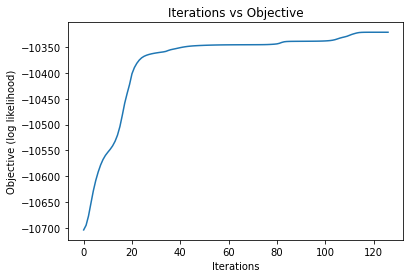

In [10]:
plt.title('Iterations vs Objective')
plt.xlabel('Iterations')
plt.ylabel('Objective (log likelihood)')
plt.plot(scores[1:])  # initial objective value is discarded because E step has not yet been performed
plt.show()

## 3.b. (10 pts)
**TODO:**
- **Using the model you estimated in (a) above, compute the probability of the first gene to belong to each of the three clusters.**
- **Bonus question: do this for all genes and examine the cluster memberships.**

## 3.c. (10 pts)
**TODO:**
- **For $K = 3$, try 10 different random initializations for all parameters. Answer these questions:**
    - **What is the data log-likelihood at convergence for each initialization?**
    - **Which one do you think was the best initialization?**

## 3.d. (10 pts)
**TODO:**
- **Run the EM algorithm, assuming $K = 3, \ldots, 10$ clusters.**
- **Plot the log-likelihood of the data across different values for $K$.** 
- **What do you think is the best choice for the number of clusters?**